##**PICSUM** 

Picsum generates abstractive and extractive summaries to enable them to digest voluminous information in shorter periods. It gives out the important sentences and  further enhances their comprehension by creating fill-in-the-blank questions from the summaries, enabling them to assess their understanding of the condensed information.


# Downloading the prerequisites

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!git clone https://github.com/dhaneshragu/text2questions.git
%cd text2questions/fill-ups
!pip install streamlit
!pip install transformers 
!pip install sentencepiece
!pip install datasets
!git clone https://github.com/Nidhi15-02/question_generation.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (5,201 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

Importing necessary Libraries and Providing Input Image

In [7]:
import pytesseract
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

Saving download (3).png to download (3).png


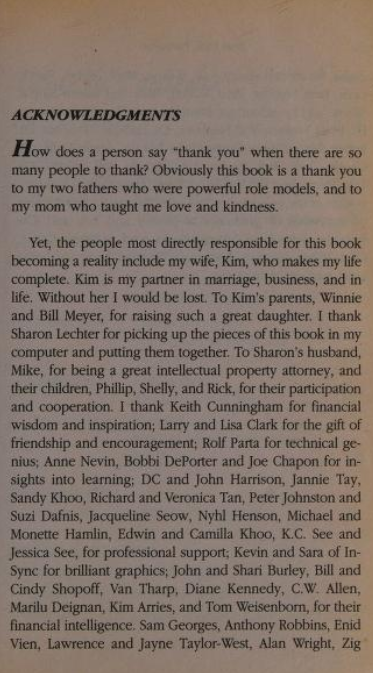

In [8]:
from google.colab import files

uploaded = files.upload()
filename=list(uploaded.keys())[0]
Image.open(filename)

# STEP 1. OCR

This involves reading text from the image. The image's text is read using Tesseract OCR (optical character recognition unit), which employs adaptive thresholding to preprocess the image. It then generates character outlines around the text. These outlines are organized into lines and words and matched against existing wordlists. If a match is found, the resulting word is output.

In [9]:
extractedInformation = pytesseract.image_to_string(Image.open(filename))
extractedInformation

' \n\n \n\nACKNOWLEDGMENTS\n\nHow does a person say “thank you" when there are so\nmany people to thank? Obviously this book is a thank you\nto my two fathers who were powerful role models, and to\nmy mom who taught me love and kindness.\n\nYet, the people most directly responsible for this book\nbecoming a reality include my wife, Kim, who makes my life\ncomplete. Kim is my partner in marriage, business, and in\nlife, Without her I would be lost. To Kim\'s parents, Winnie\n‘and Bill Meyer, for raising such a great daughter. I thank\n‘Sharon Lechter for picking up the pieces of this book in my\n‘computer and putting them together. To Sharon\'s husband,\nMike, for being a great intellectual property attorney, and\ntheir children, Phillip, Shelly, and Rick, for their participation\nand cooperation. I thank Keith Cunningham for financial\n‘wisdom and inspiration; Larry and Lisa Clark for the gift of\nfriendship and encouragement; Rolf Parta for technical ge-\nnius; Anne Nevin, Bobbi DePor

In [10]:
extractedInformation=' '.join(extractedInformation.split('\n'))

In [11]:
extractedInformation

'      ACKNOWLEDGMENTS  How does a person say “thank you" when there are so many people to thank? Obviously this book is a thank you to my two fathers who were powerful role models, and to my mom who taught me love and kindness.  Yet, the people most directly responsible for this book becoming a reality include my wife, Kim, who makes my life complete. Kim is my partner in marriage, business, and in life, Without her I would be lost. To Kim\'s parents, Winnie ‘and Bill Meyer, for raising such a great daughter. I thank ‘Sharon Lechter for picking up the pieces of this book in my ‘computer and putting them together. To Sharon\'s husband, Mike, for being a great intellectual property attorney, and their children, Phillip, Shelly, and Rick, for their participation and cooperation. I thank Keith Cunningham for financial ‘wisdom and inspiration; Larry and Lisa Clark for the gift of friendship and encouragement; Rolf Parta for technical ge- nius; Anne Nevin, Bobbi DePorter and Joe Chapon for 

# STEP 2. Generate summary

Now, we will create a summary from the text,we employ a transformer model called BART. This approach consists of two stages: encoding and decoding. Encoding involves generating tokens from the extracted information, while decoding involves creating a summary from these tokens.

In [ ]:
import torch
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.cluster.util import cosine_distance
import networkx as nx
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from transformers import BartTokenizer, BartForConditionalGeneration
#Checking if gpu is available otherwise using the cpu

if torch.cuda.is_available():
   device = torch.device("cuda")
else:
   device = torch.device("cpu")



def load_pegasus_model():
    model_name = "google/pegasus-xsum"
    summarizer = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)
    tokenizer = PegasusTokenizer.from_pretrained(model_name)
    return summarizer, tokenizer

def load_bart_model():
    model_name = "facebook/bart-large-cnn"
    summarizer = BartForConditionalGeneration.from_pretrained(model_name).to(device)
    tokenizer = BartTokenizer.from_pretrained(model_name)
    return summarizer, tokenizer

In [13]:
pegasus_model,pegasus_tokenizer=load_pegasus_model()


In [ ]:
batch = pegasus_tokenizer.prepare_seq2seq_batch(extractedInformation, truncation=True, padding='longest', return_tensors="pt").to(device)
        
summary_ids = pegasus_model.generate(**batch,
                                            num_beams=10,
                                            #num_return_sequences=num_return_sequences,
                                            no_repeat_ngram_size = 2,
                                            length_penalty = 1,
                                            min_length = int(len(extractedInformation)/10),
                                            max_length = int(len(extractedInformation)/6),
                                            early_stopping = True)
        
output = [pegasus_tokenizer.batch_decode(summary_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)][0][0]


In [15]:
print(output)

In my new book, Zig Ziglar's The Power of Now, I invite you to join me in saying "thank you" to the many people who have helped me achieve my goals in life, business, and in my life as a father, husband, father-in-law, son, brother, sister, uncle, aunt, cousin, friend, co-worker, teacher, coach, mentor, entrepreneur, author, motivational speaker, television presenter, radio host, film director, producer, photographer, writer, musician, philanthropist, businessman, businesswoman, spiritual leader and author of the New York Times best-selling series of self-help books, The Zig-Ziglar Method, to learn more about the power of now and how to use it to achieve your personal and professional goals.


# Step 3. Getting Important Sentences

This step involves highlighting important sentences from the text. This is done by creating word embeddings in the form of vectors and then calculating the similarity between the sentences using cosine distance between a pair of vectors. Then we create a graph from the similarity matrix generated. This graph is page-ranked to find out the important sentences in the text.

In [19]:
# EXTRACTIVE SUMMARY

#Cleaning the given text so that it gives better output for the extractive summarisation

def clean_text(text):
  article = text.split(".")
  article=[sentence for sentence in article if sentence!=""]
  # print(article)

  sentences = []

  for sentence in article:
      #print(sentence)
      sentence=sentence.replace(",", " , ").replace("'", " ' ").split(" ")
      #sentence=sentence.replace("[^a-zA-Z]", " ").split(" ")
      sentence=[word for word in sentence if word!=""]
      sentences.append(sentence)
    
  return sentences

def sentence_similarity(sent1, sent2, stopwords):   #Creating words in sentences to one hot encoding and then finding cosine distance between the vectors inorder to measure closeness
  
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)


def build_similarity_matrix(sentences, stop_words):
  
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

def generate_summary(text, top_n='2'):

    if top_n==  None or top_n=="":
      top_n=2
    top_n=int(top_n)
    # Step 1 - Clean text to generate sentences

    sentences=clean_text(text)
    stop_words = stopwords.words('english')
    stop_words.append(".")
    stop_words.append(",")
    summarize_text = []

    # Step 2 - Generate Similary Martix across sentences

    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)
    # print(sentence_similarity_martix)

    # Step 3 - Rank sentences in similarity martix

    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    # print(sentence_similarity_graph)

    scores = nx.pagerank(sentence_similarity_graph)
    # print(scores)

    # Step 4 - Sort the rank and pick top sentences

    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    #Sorting the scores in decending order
    # print("Indexes of top ranked_sentence order are ", ranked_sentence)   

    for i in range(top_n):
      ranked_sentence[i][1][0]=ranked_sentence[i][1][0].capitalize()    #Capitalising 1st letter of sentence
      # print(ranked_sentence[i][1][0]) 
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarized text

    extractive_summarized=". ".join(summarize_text).replace(" , ",", ").replace(" ' ","'") + "."
    return extractive_summarized

no_of_sentences=4
extractive_summary=generate_summary(extractedInformation, no_of_sentences)
print("Important Sentences\n")
for index,sent in enumerate(extractive_summary.split(".")):
  if sent!='':print(index,sent+'.')

Important Sentences

0 Yet, the people most directly responsible for this book becoming a reality include my wife, Kim, who makes my life complete.
1  To Kim's parents, Winnie ‘and Bill Meyer, for raising such a great daughter.
2  Kim is my partner in marriage, business, and in life, Without her I would be lost.
3  See and Jessica See, for professional support; Kevin and Sara of In- ‘Syne for brilliant graphics; John and Shari Burley, Bill and Cindy Shopoff, Van Tharp, Diane Kennedy, C.


# STEP 4. Generate Fill in the blanks

This involves generating fill in the blanks. Question-answer pairs are generated using the AAQG method with T5 (Answer Aware question generation), are converted into declarative sentences using the BART model trained on the QA2D dataset to generate fill-in-the-blank questions.

In [ ]:
from helper import *
question_df = get_fillups(extractedInformation)[['answer','final_text']].reset_index(drop=True)

In [17]:
fillup_df={'question':[],'answer':[]}

In [18]:
import re
for i in range(len(question_df)):
        if re.search(re.escape(question_df.answer.iloc[i]),question_df.final_text.iloc[i], flags=re.IGNORECASE):
            reg = re.compile(re.escape(question_df.answer.iloc[i]), re.IGNORECASE)
            fillup_df['question'].append(re.sub(reg, "___________", question_df.final_text.iloc[i]))
            fillup_df['answer'].append(question_df.answer.iloc[i])
fillup_df=pd.DataFrame(fillup_df)
fillup_df       

,question,answer
0,A person says ___________ when there are so ma...,thank you
1,___________ taught me love and kindness.,my mom
2,___________ is my wife.,Kim
3,Kim is ___________ in my life.,my partner
4,___________ are Kim's parents.,Winnie ‘and Bill Meyer
5,Sharon Lechter's husband is ___________.,Mike
6,I thanked ___________ for financial wisdom and...,Keith Cunningham
7,___________ created the graphics for In- ‘Syne.,Kevin and Sara
8,Tom Weisenbom had ___________ in common.,financial intelligence
